Libraries

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

[*********************100%%**********************]  1 of 1 completed


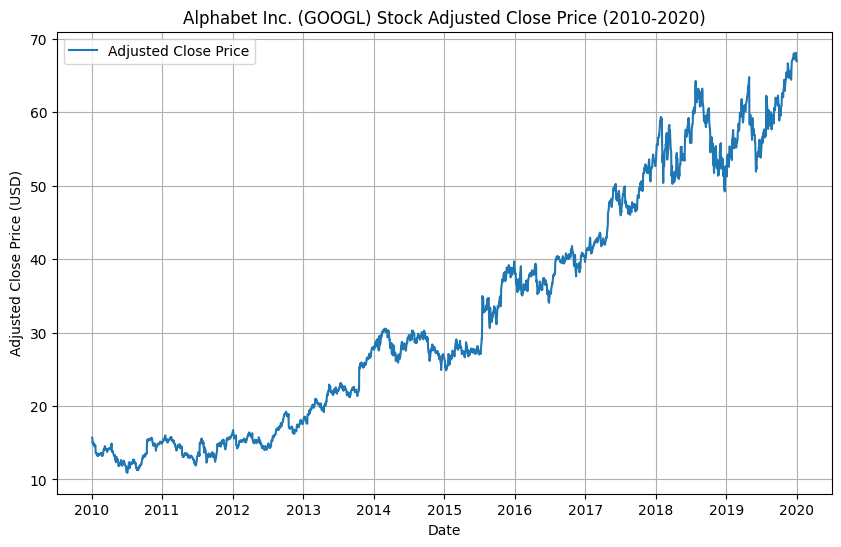

In [37]:
google_stock_data = yf.download('GOOGL', start='2010-01-01', end='2020-01-01')

plt.figure(figsize=(10, 6))
plt.plot(google_stock_data['Adj Close'], label='Adjusted Close Price')
plt.title('Alphabet Inc. (GOOGL) Stock Adjusted Close Price (2010-2020)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

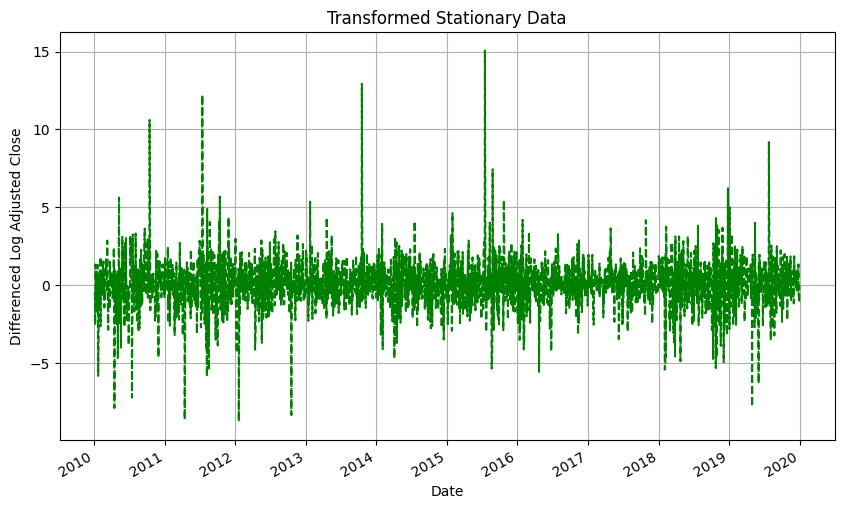

In [38]:
google_stock_data['Log_Adj_Close'] = np.log(google_stock_data['Adj Close'])
google_stock_data['Diff_Log_Adj_Close'] = google_stock_data['Log_Adj_Close'].diff().dropna() * 100

plt.figure(figsize=(10, 6))
google_stock_data['Diff_Log_Adj_Close'].plot(title='Transformed Stationary Data', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Differenced Log Adjusted Close')
plt.grid(True)
plt.show()

In [39]:
data = google_stock_data['Adj Close'].values.reshape(-1, 1)

# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 60 # 60 days
X, y = create_sequences(scaled_data, time_steps)

In [40]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)


input_shape = (X_train.shape[1], 1)

Model 1: LSTM

In [41]:
model_1 = Sequential()
model_1.add(LSTM(units=50, return_sequences=True, input_shape=(input_shape)))
model_1.add(Dropout(0.2))
model_1.add(LSTM(units=50))
model_1.add(Dropout(0.2))
model_1.add(Dense(units=1)) # Output layer

model_1.compile(optimizer='adam', loss='mean_squared_error')

model_1.fit(X_train, y_train, epochs=100, batch_size=16)

predicted_stock_price = model_1.predict(X_test)

Epoch 1/100
123/123 [==============================] - 4s 8ms/step - loss: 0.0058
Epoch 2/100
123/123 [==============================] - 1s 11ms/step - loss: 0.0014
Epoch 3/100
123/123 [==============================] - 1s 8ms/step - loss: 0.0010
Epoch 4/100
123/123 [==============================] - 1s 8ms/step - loss: 0.0011
Epoch 5/100
123/123 [==============================] - 1s 10ms/step - loss: 0.0010
Epoch 6/100
123/123 [==============================] - 1s 10ms/step - loss: 9.7264e-04
Epoch 7/100
123/123 [==============================] - 1s 11ms/step - loss: 0.0010
Epoch 8/100
123/123 [==============================] - 1s 8ms/step - loss: 8.7817e-04
Epoch 9/100
123/123 [==============================] - 1s 8ms/step - loss: 7.5181e-04
Epoch 10/100
123/123 [==============================] - 1s 8ms/step - loss: 7.6910e-04
Epoch 11/100
123/123 [==============================] - 1s 8ms/step - loss: 8.9334e-04
Epoch 12/100
123/123 [==============================] - 1s 8ms/step - lo

In [42]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_10 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
actual_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

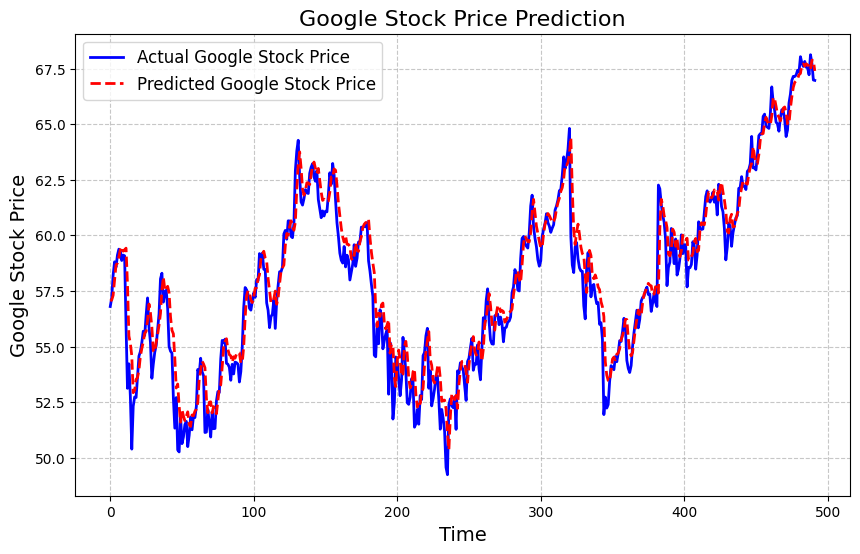

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(actual_stock_price, color='blue', label='Actual Google Stock Price', linewidth=2)
plt.plot(predicted_stock_price, color='red', label='Predicted Google Stock Price', linewidth=2, linestyle='dashed')
plt.title('Google Stock Price Prediction', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Google Stock Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Model 2: GRU

In [45]:
model_2 = Sequential()
model_2.add(GRU(units=50, return_sequences=True, input_shape=(input_shape)))
model_2.add(Dropout(0.2))
model_2.add(GRU(units=50))
model_2.add(Dropout(0.2))
model_2.add(Dense(units=1)) # Output layer

model_2.compile(optimizer='adam', loss='mean_squared_error')

model_2.fit(X_train, y_train, epochs=100, batch_size=16)

predicted_stock_price_model_2 = model_2.predict(X_test)




Epoch 1/100
123/123 [==============================] - 4s 7ms/step - loss: 0.0060
Epoch 2/100
123/123 [==============================] - 1s 7ms/step - loss: 0.0013
Epoch 3/100
123/123 [==============================] - 1s 7ms/step - loss: 0.0010
Epoch 4/100
123/123 [==============================] - 1s 7ms/step - loss: 0.0010
Epoch 5/100
123/123 [==============================] - 1s 9ms/step - loss: 9.5576e-04
Epoch 6/100
123/123 [==============================] - 1s 10ms/step - loss: 9.1057e-04
Epoch 7/100
123/123 [==============================] - 1s 10ms/step - loss: 8.2856e-04
Epoch 8/100
123/123 [==============================] - 1s 8ms/step - loss: 7.9764e-04
Epoch 9/100
123/123 [==============================] - 1s 7ms/step - loss: 7.7380e-04
Epoch 10/100
123/123 [==============================] - 1s 7ms/step - loss: 7.0594e-04
Epoch 11/100
123/123 [==============================] - 1s 7ms/step - loss: 6.4761e-04
Epoch 12/100
123/123 [==============================] - 1s 7ms/ste

In [46]:
model_2.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 60, 50)            7950      
                                                                 
 dropout_12 (Dropout)        (None, 60, 50)            0         
                                                                 
 gru_5 (GRU)                 (None, 50)                15300     
                                                                 
 dropout_13 (Dropout)        (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 23301 (91.02 KB)
Trainable params: 23301 (91.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [47]:
predicted_stock_price_model_2 = scaler.inverse_transform(predicted_stock_price_model_2.reshape(-1, 1))
actual_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

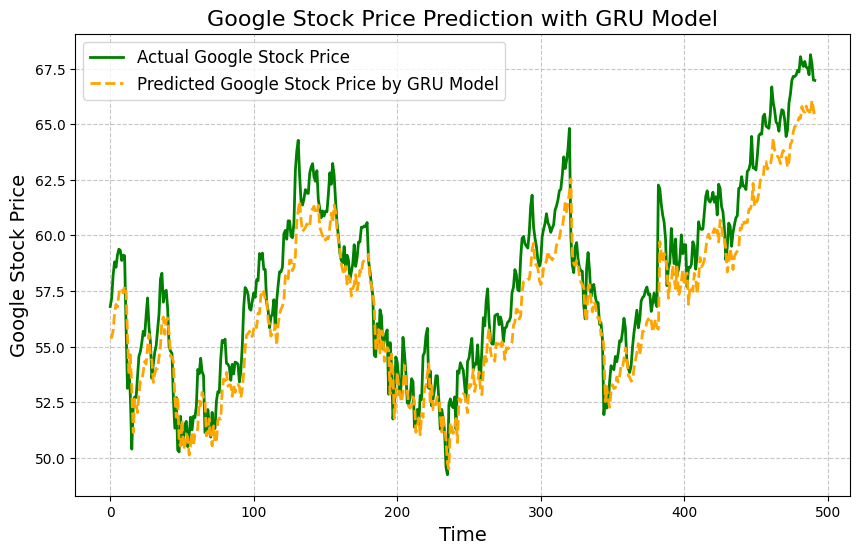

In [48]:
plt.figure(figsize=(10,6))
plt.plot(actual_stock_price, color='green', label='Actual Google Stock Price', linewidth=2)
plt.plot(predicted_stock_price_model_2, color='orange', label='Predicted Google Stock Price by GRU Model', linewidth=2, linestyle='dashed')
plt.title('Google Stock Price Prediction with GRU Model', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Google Stock Price', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


RMSE

In [51]:

rmse_model_1 = np.sqrt(mean_squared_error(actual_stock_price, predicted_stock_price))
rmse_model_2 = np.sqrt(mean_squared_error(actual_stock_price, predicted_stock_price_model_2))


In [52]:
print("RMSE LSTM:", rmse_model_1)
print("RMSE GRU:", rmse_model_2)

RMSE LSTM: 1.0902963353626323
RMSE GRU: 1.5851712361826888
